# Primeiros Programas Quânticos com Qiskit


Desenharemos um circuito simples com apenas um bit quântico (qubit) e um bit clássico.

Aplicaremos o operador NOT - *X-gate* - no qubit, e então mediremos o valor do qubit, o resultado será salvo no bit clássico.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q = QuantumRegister(1,"q0")

c = ClassicalRegister(1,"c0")

# Definindo nosso circuito quântico

qc = QuantumCircuit(q,c)

# Aplicando o operador NOT, representado por um "x"  

qc.x(q[0])

# Fazendo a medição do nosso cirtuito quântico

qc.measure(q[0],c[0])

print("Nosso circuito está pronto!")

Nosso circuito está pronto!


### Visualizar o circuito

Para visualização do nosso circuito quântico, devemos utilizar alguns métodos do Qiskit.

In [2]:
# Desenharemos nosso circuito utilizando o "draw"

qc.draw()

┌───┐┌─┐
  q0: ┤ X ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

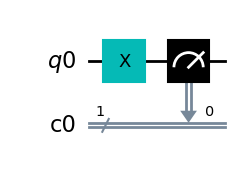

In [3]:
# Podemos melhorar essa visualização usando o matplotlib

qc.draw(output='mpl')

No começo, cada bit quântico ou clássico possui o valor/estado 0. 

Por convenção na computação e mecânica quântica, o estado 0 é denotado por $\ket{0}$. Esta notação é chamada de **ket**. Os estados dos qubits "0" e "1" podem ser expressos por:

$ \ket{0} = \begin{pmatrix}
1 \\
0
\end{pmatrix} $ e $\ket{1} = \begin{pmatrix}
0 \\
1
\end{pmatrix}$

Após aplicarmos a porta X, o estado esperado do bit quântico é que seja igual a $\ket{1}$. Dessa forma, o valor do bit clássico após a medição é esperado que seja igual a 1.

In [4]:
from qiskit import execute, Aer

# Três parâmetros
#   1. mycircuit
#   2. estrutura onde será executado: usaremos um simulador local
#   3. quantas vezes será executado, por padrão é 1024

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)

counts = job.result().get_counts(qc)
print(counts)

{'1': 1024}


O dicionário nos mostra que o valor 1 é medido 1024 vezes.

*A saída é composta por pares, e cada par mostra (i) o resultado de medição e (ii) sua frequência.* 

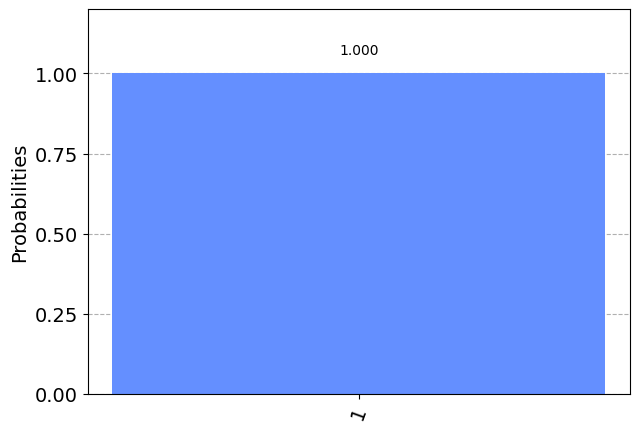

In [5]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

### Operador Hadamard

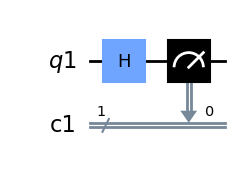

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q1 = QuantumRegister(1,"q1")

c1 = ClassicalRegister(1,"c1")

qc1 = QuantumCircuit(q1,c1)

# Aplicando o operador Hadamard, representado por um "h"  

qc1.h(q1[0])


qc1.measure(q1[0],c1[0])
qc1.draw(output='mpl')

{'0': 4986, '1': 5014}

Estado 0 é observado com uma frequência % 49.86
Estado 1 é observado com uma frequência % 50.14



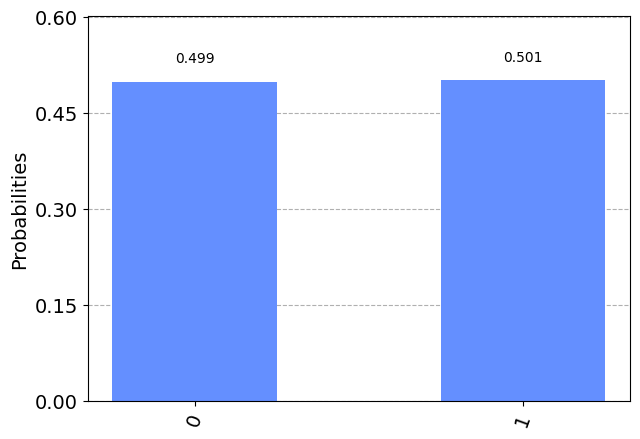

In [7]:
job = execute(qc1, Aer.get_backend('qasm_simulator'), shots=10000)

counts = job.result().get_counts(qc1)
print(counts)

print()
n_zeros = counts['0']
n_ones = counts['1']
print("Estado 0 é observado com uma frequência %",100*n_zeros/(n_zeros+n_ones))
print("Estado 1 é observado com uma frequência %",100*n_ones/(n_zeros+n_ones))

print()
plot_histogram(counts)

## Circuito com mais de um qubit

### Novo circuito com dois qubits

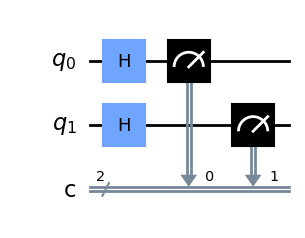

In [8]:
q2 = QuantumRegister(2,"q")
c2 = ClassicalRegister(2,"c")
qc2 = QuantumCircuit(q2,c2)

qc2.h(0)
qc2.h(1)

qc2.measure(0,0)
qc2.measure(1,1)
qc2.draw(output='mpl')

{'10': 256, '00': 268, '01': 247, '11': 229}



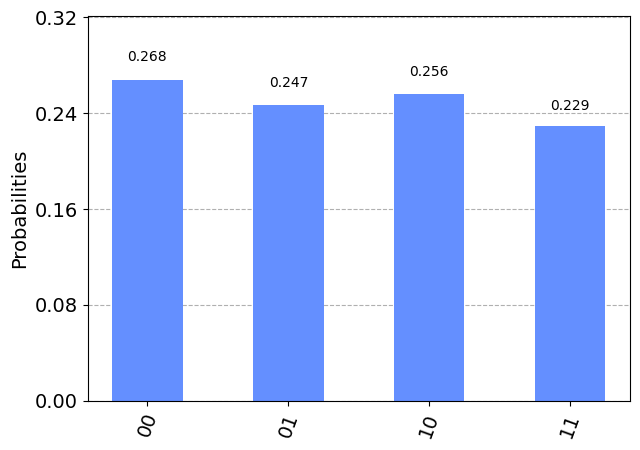

In [9]:
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc2)
print(counts)

print()
plot_histogram(counts)

### Circuito com 4 qubits

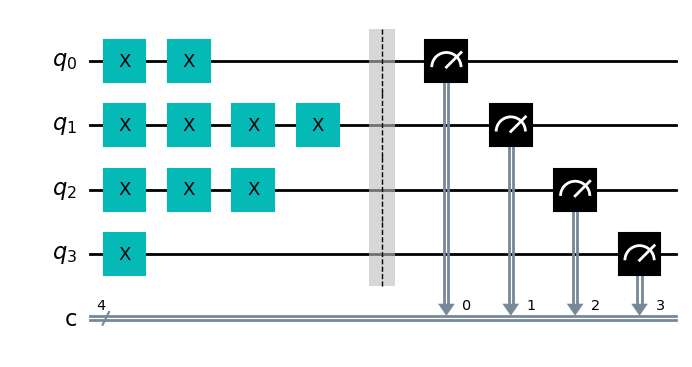

In [10]:
q3 = QuantumRegister(4,"q")
c3 = ClassicalRegister(4,"c")
qc3 = QuantumCircuit(q3,c3)

# aplicando x-gate ao primeiro qubit duas vezes
qc3.x(q3[0])
qc3.x(q3[0])

# aplicando x-gate ao quarto qubit uma vez
qc3.x(q3[3])


# aplicando x-gate ao terceiro qubit quatro vezes
qc3.x(q3[2])
qc3.x(q3[2])
qc3.x(q3[2])

# aplicando x-gate ao segundo qubit quatro vezes
qc3.x(q3[1])
qc3.x(q3[1])
qc3.x(q3[1])
qc3.x(q3[1])

# definindo uma barreira para uma melhor visualização 
qc3.barrier()

# se o tamanho dos registradores quânticos e clássicos são iguais, nós podemos definir medições em uma única linha de código
qc3.measure(q3,c3)
# os qubits e os bits clássicos são associados de acordo com seus respectivos índices

qc3.draw(output='mpl')


In [11]:
job = execute(qc3,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc3)
print(counts)

{'1100': 100}


### Outros exemplos:

- Exemplo 4

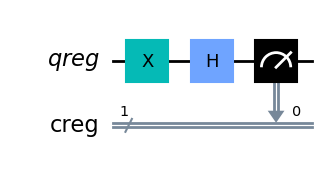

In [12]:
q4 = QuantumRegister(1,"qreg")
c4 = ClassicalRegister(1,"creg")
qc4 = QuantumCircuit(q4,c4)

qc4.x(q4[0])

qc4.h(q4[0])
qc4.measure(q4,c4)

qc4.draw(output='mpl')

In [13]:

job = execute(qc4,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc4)
print(counts)

{'1': 50, '0': 50}


- Exemplo 5:

    Podemos realizar alguns experimentos mais complexos e aprender sobre o comportamento de circuitos quânticos. 

    Nosso circuito tem dois qubits: $ q_0 $ e $ q_1 $.

    Iremos fazer as seguintes operações:

    - Aplicar Hadamard em ambos os qubits.

    - Aplicar CNOT($ q_1 $,$ q_0 $).

    - Aplicar Hadamard em ambos os qubits.

    - Medir o circuito.

    Inicializaremos por iterações os qubits em $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, e $ \ket{11} $.

    Executaremos o programa 100 vezes para cada iteração, e então checaremos o resultado para cada uma delas.

    Por fim, vamos observar como o circuito implementa o CNOT($q_0$,$q_1$).

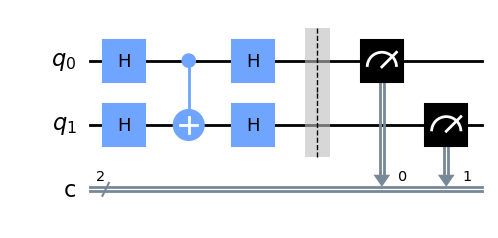

00 é mapeado para {'00': 100}


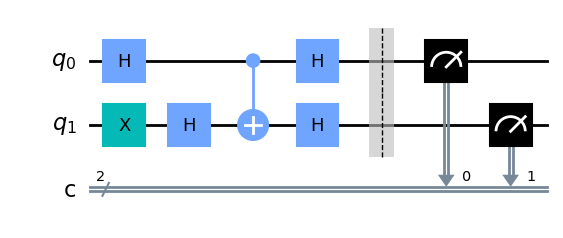

01 é mapeado para {'11': 100}


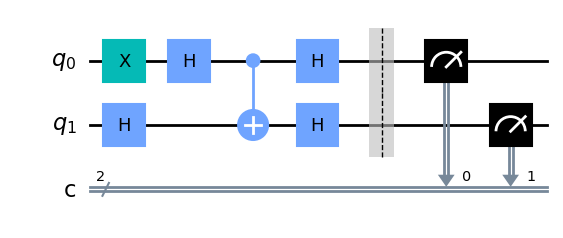

10 é mapeado para {'01': 100}


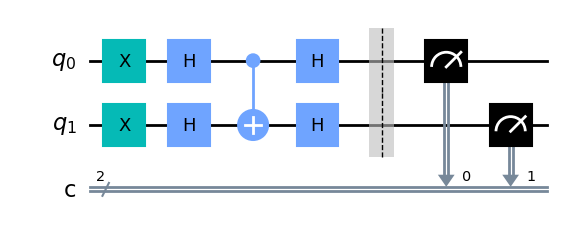

11 é mapeado para {'10': 100}


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# Por ser um circuito com 2 qubits, sabemos que todos os estados possíveis são dados por:
todos_estados = ['00','01','10','11']

for estado in todos_estados:
    q =  QuantumRegister(2,"q") 
    c = ClassicalRegister(2,"c") 
    qc = QuantumCircuit(q,c) 
    
    # inicializando os inputs com respeito a ordem de leitura do Qiskit
    if estado[0]=='1':
        qc.x(q[0]) # configurando o estado do qubit 0 para |1>
    if estado[1]=='1':
        qc.x(q[1]) # configurando o estado do qubit 1 para |1>

    # aplicando o h-gate nos dois qubits
    qc.h(q[0])
    qc.h(q[1])

    # aplicando o cx(qubit 0,qubit 1)
    qc.cx(q[0],q[1])

    # aplicando h-gate nos dois qubits
    qc.h(q[0])
    qc.h(q[1])

    # medindo ambos os qubits
    qc.barrier()
    qc.measure(q,c)
    
    display(qc.draw(output='mpl'))
    
    # execute the circuit 100 times in the local simulator
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(estado,"é mapeado para",counts)